In [1]:
#from six.moves import urllib
#from sklearn.datasets import fetch_mldata
#try:
#    mnist = fetch_mldata('MNIST original')
#except urllib.error.HTTPError as ex:
#    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    import urllib
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")
    print(mnist)

Success!
{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original'}


In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X_train, X_test, y_train, y_test = X[:60000] , X[60000:], y[:60000],y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train =  X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

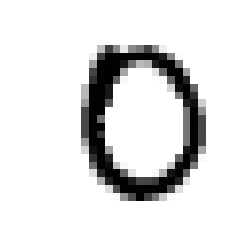

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[1200]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [20]:
kn_clf.predict([some_digit])

array([0.])

In [21]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(kn_clf, X_train, y_train, cv=2)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5878,    4,    3,    2,    1,    6,   20,    3,    4,    2],
       [   1, 6699,   13,    0,    4,    1,    4,   14,    2,    4],
       [  57,   79, 5665,   19,   10,    3,    9,   90,   18,    8],
       [   4,   17,   40, 5890,    1,   70,    4,   40,   34,   31],
       [   4,   62,    6,    1, 5606,    0,   17,   10,    2,  134],
       [  21,   13,    5,   89,    8, 5175,   66,    3,   11,   30],
       [  25,   16,    4,    0,    6,   25, 5842,    0,    0,    0],
       [   4,   75,   15,    2,   20,    1,    0, 6074,    2,   72],
       [  21,   89,   20,   97,   32,  117,   31,   25, 5353,   66],
       [  15,   15,    5,   52,   58,   10,    3,   91,   13, 5687]],
      dtype=int64)

In [22]:
#precision and recall score
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

TypeError: precision_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
recall_score(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)